# TP : accréditation anonyme et coloration de graphe

Ce TP va consister à accréditer une personne d’un droit sur la base d’une démonstration de capacité à colorer un graphe sans divulguer la coloration choisie.

In [20]:
from typing import NamedTuple
import hashlib
import random

import matplotlib.pyplot as plt
import networkx as nx

## Partie 1

Dans cette première partie, on crée une structure de données représentant un graphe coloré par sa matrice d’adjacence et la coloration de ses nœuds.

Ensuite, on définit une fonction générant aléatoirement les couleurs des sommets, puis générant avec une chance sur deux une arête entre les deux sommets considérés s’ils sont d’une couleur différente, et construisant un objet `Graphe` avec ces informations.
En tant que prouveur, on peut générer le graphe que l’on souhaite.

In [21]:
COULEURS = ("red", "green", "blue")


class Graphe(NamedTuple):
    matrice_adjacence: list[list[int]]
    coloriage: list[str]

    def __len__(self):
        return len(self.coloriage)


def generer_graphe_3coloriable(n: int):
    # Étape 1 : Assigner une couleur aléatoire à chaque noeud
    coloriage = [random.choice(COULEURS) for _ in range(n)]

    matrice_adjacence = [[0] * n for _ in range(n)]
    # Étape 2 : Générer la matrice d'adjacence
    for i in range(n):
        for j in range(i + 1, n):
            if coloriage[i] != coloriage[j]:
                # Relier les noeuds avec une probabilité de 1/2
                tirage = random.random()
                if tirage < 0.5:
                    # La matrice d'adjacence est symétrique
                    matrice_adjacence[i][j] = 1
                    matrice_adjacence[j][i] = 1

    return Graphe(matrice_adjacence, coloriage)


def afficher_graphe(graphe: Graphe):
    G = nx.Graph()
    for i in range(len(graphe)):
        G.add_node(i, color=graphe.coloriage[i])

    for i in range(len(graphe)):
        for j in range(i + 1, len(graphe)):
            if graphe.matrice_adjacence[i][j] == 1:
                G.add_edge(i, j)

    pos = nx.spring_layout(G)
    node_colors = [G.nodes[node]['color'] for node in G.nodes]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color='white')
    plt.title("Graphe 3-Coloriable")
    plt.show()

Nombre de noeuds : 20
Matrice d'adjacence du graphe :
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

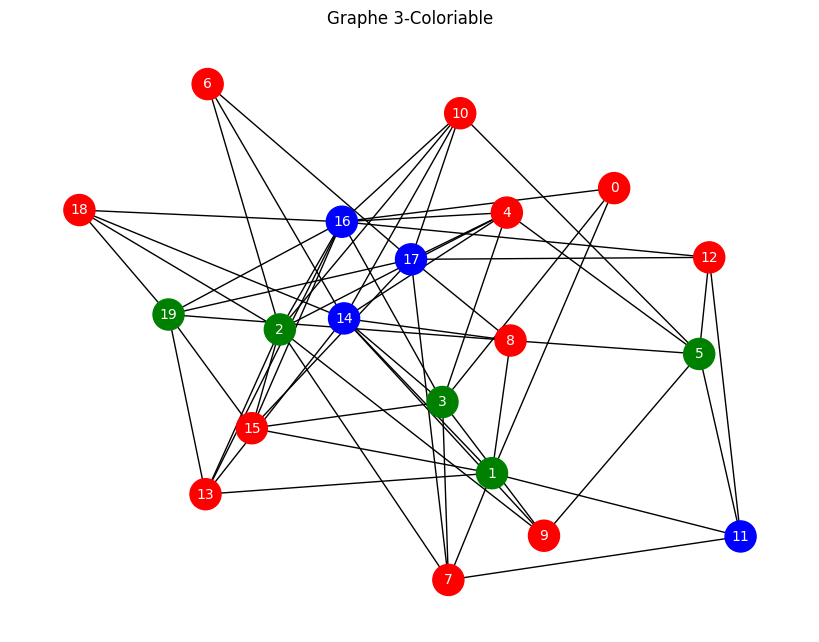

In [22]:
# Exemple d'utilisation

# Construit un graphe de 20 noeuds
N = 20
graphe = generer_graphe_3coloriable(N)

# Afficher les informations du graphe
print("Nombre de noeuds :", len(graphe))

print("Matrice d'adjacence du graphe :")
for ligne in graphe.matrice_adjacence:
	print(ligne)

print("Tableau des couleurs :")
print(graphe.coloriage)

# Afficher le graphe avec les couleurs correspondantes
afficher_graphe(graphe)

## Partie 2

Ensuite, on va devoir démontrer au vérifieur que l’on est en mesure de colorer ce graphe avec seulement trois couleurs en divulguant la structure du graphe sans dévoiler la coloration choisie.

Pour cela, on va construire pour chaque nœud une valeur permettant de vérifier la validité de la coloration du graphe sans en révéler la couleur. Ces valeurs ne doivent donc pas permettre de retrouver la couleur avec laquelle elles ont été construites. Une possibilité d’implémentation est, par exemple, de hacher par une fonction $h$ la concaténation de la couleur du sommet $c_i$ avec une valeur aléatoire $r_i$ tirée une seule fois pour chacun. On écrira donc $y_i = h(r_i||c_i)$.

In [23]:
def hacher(ci, ri):
	# Calcule le haché de la concaténation de ri et ci avec la fonction de hachage choisie
	return hashlib.sha1(bytes(str(ri) + str(ci), encoding="ascii")).hexdigest()


def permutation_couleurs(coloriage: list[str]):
	couleurs_melangees = list(COULEURS)
	random.shuffle(couleurs_melangees)
	return [couleurs_melangees[COULEURS.index(couleur)] for couleur in coloriage]


class GageColoriage(NamedTuple):
	ci: list[int]
	ri: list[int]
	yi: list[int]

	def get(self, i: int):
		return self.ci[i], self.ri[i], self.yi[i]


def mise_en_gage_coloriage(coloriage: list[str]):
	# Liste des numéros des couleurs ci des noeuds
	ci = [COULEURS.index(couleur) for couleur in coloriage]

	# Liste des valeurs aléatoires ri des noeuds
	ri = [random.randrange(0, 2 ** 128) for _ in range(len(coloriage))]

	# Liste des hachés des noeuds
	# Pour chaque noeud, calcule son haché cryptographique yi à partir de ci et ri
	yi = [hacher(ci[i], ri[i]) for i in range(len(coloriage))]

	return GageColoriage(ci, ri, yi)

In [24]:
# Exemple d'utilisation

# Crée une permutation des couleurs du graphe
coloriage = permutation_couleurs(graphe.coloriage)

# Construit une mise en gage
gage_coloriage = mise_en_gage_coloriage(coloriage)
gage_coloriage.yi

['1cddb8594a2142d425045ee7eff59af6a709e3fa',
 '61565ce2b4ece8a97dfccb5cab53d054f0ef2856',
 '6e45fe3553c9ffa08582c0865e3470c7959d3477',
 '43c5863e59023d4294596fd662ff88af22065825',
 '5bd6c7c2a3dbf837e73222bc26016af869d65eba',
 '50b890baf383e80170b8a5d7f304db3b5b69cadb',
 '7f791e0b2cad8b4fc665e09d17ac4d7e7761ae4b',
 '6d2e16248ae937433a42858779a3e130035e4096',
 'd0e3995e594b8ee6d434f236d08ff9348aaad689',
 '0726650c8a1a46167c8ae4f8976f392ee7cec881',
 '437152953ce0b8bdfa5a67268951061b70cc9b2b',
 '6a67f4f78d8f5a2a3a26192372f36a11fbb6aeaf',
 '0753709b5b34563dd0f7cfa26ad745bcfecec73f',
 '8532f4221e0c9f6c7c27e06a29d8d5f50f9a1c1e',
 '930597380237087f8b59acc1f63063c3b03cd445',
 '30043f62ceadadd421353cda5f8196d37326c704',
 '70f2b4851675bca96891e09883b4531a05ba453c',
 '298d35be35a58f71a8769bb6f30dc794498a951f',
 'd76bfbb6cc93232d1b19fa817b3fc58a9476aa98',
 '4f63edf6820d4f605461e5ef369ce7213fb9adda']

## Partie 3

Enfin, pour démontrer au vérifieur notre capacité à colorer le graphe, on va fournir au vérifieur la matrice d’adjacence et la liste des hachés de chaque sommet et celui-ci va nous demander de fournir les valeurs $c_k$ et $r_k$ de deux sommets $i$ et $j$ adjacents de la matrice. Il va vérifier que les couleurs $c_i$ et $c_j$ soient bien différentes mais permettent de reconstruire les mêmes hachés cryptographiques avec $r_i$ et $r_j$. On va répéter cette opération un grand nombre de fois en permutant les couleurs et en produisant une nouvelle mise en gage à chaque fois.

Si au bout de toutes ces tentatives, le vérifieur n’est pas parvenu à nous mettre en échec, il reconnaitra notre capacité à colorer le graphe avec trois couleurs.

In [25]:
def preuve_coloriage(matrice_adjacence: list[list[int]], mise_en_gage: GageColoriage):
    # i est un sommet quelconque
    i = random.randrange(len(matrice_adjacence))
    # j est un sommet voisin à i tiré au hasard
    j = random.choice([k for k, v in enumerate(matrice_adjacence[i]) if v == 1])

    # Récupère les valeurs associées à i et j
    ci, ri, yi = mise_en_gage.get(i)
    cj, rj, yj = mise_en_gage.get(j)
    if not (ci != cj and yi == hacher(ci, ri) and yj == hacher(cj, rj)):
        return False

    return True

In [26]:
# Exemple d'utilisation

# Vérifie à de nombreuses reprises que la coloration est valide
# À chaque tour de boucle, l'utilisateur produit une nouvelle coloration par permutation et crée une mise en gage que le vérificateur va mettre à l’épreuve
for _ in range(400):
	coloriage = permutation_couleurs(graphe.coloriage)
	gage_coloriage = mise_en_gage_coloriage(coloriage)
	assert preuve_coloriage(graphe.matrice_adjacence, gage_coloriage)

## Partie 4

### Question 1

Si le vérificateur est malhonnête, il va demander à l’utilisateur de fournir la couleur et la valeur aléatoire de deux sommets non adjacents, ce qui peut mettre en échec l’utilisateur qui pourrait fournir la même couleur.

(A FINIR: cf. cours 2 p. 35)

## Question 2

De même, si le vérificateur ne produit pas suffisamment d’itérations de vérification, il n’aura pas la garantie que l’utilisateur sait produire un coloriage et ne répond pas juste au hasard. Plus le nombre de vérifications augmente, plus la chance que l’utilisateur réponde correctement au hasard diminue.

## Question 3


## Tests

[TODO les tests unitaires]